<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Dim_reduct_LLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LLE (Локальное линейное вложение) - метод который пытается представить данные как двумерные (так как выбираем 2 измерения) которые были вложены в пространство большей размерности. Например swiss_roll - это плоский лист (2 dim) с точками данных, который был свернут и размещен в трехмерном пространстве. Метод старается сохранить связи каждой точки со своими соседями (кол-во выбираем) чем и достигается локальность и нелинейность.

In [5]:
# импорт
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding as LLE
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# данные
X, y = make_swiss_roll(n_samples=300, noise=0.2, random_state=42)
# стандартизация
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

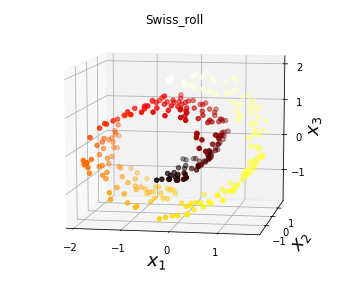

In [28]:
# печать
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_std[:, 0],
           X_std[:, 1],
           X_std[:, 2],
           c=y,                   # откуда метки
           cmap=plt.cm.hot)       # цветовая гамма
ax.view_init(10, -80)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xticks(range(-2, 3))
ax.set_yticks(range(-2, 3))
ax.set_zticks(range(-2, 3))
ax.set_title('Swiss_roll')
plt.show();

In [30]:
# создание экземпляра
lle = LLE(n_neighbors=10,   # кол-во соседей для расчета положения
          n_components=2,   # кол-во измерений - сжимаем до двух
          random_state=42)
# обучение
lle.fit(X_std)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
                       random_state=42, reg=0.001, tol=1e-06)

In [48]:
# сжимаем рулет
X_lle = lle.transform(X_std)

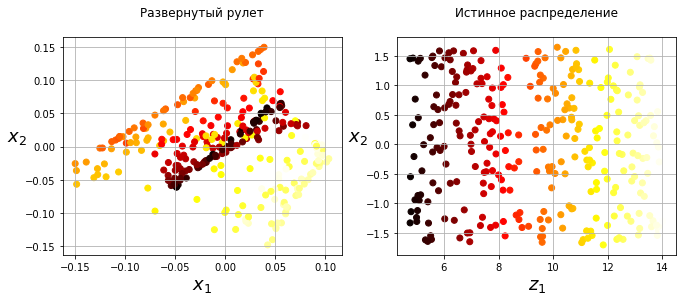

In [54]:
# сравнение результата сжатия и истинного распределения
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X_lle[:, 0],
            X_lle[:, 1],
            c=y,
            cmap=plt.cm.hot)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$  ', fontsize=18, rotation=0)
plt.grid(True)
plt.title('Развернутый рулет\n')

plt.subplot(122)
plt.scatter(y, 
            X_std[:, 1], 
            c=y, 
            cmap=plt.cm.hot)
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$x_2$  ' , fontsize=18, rotation=0)
plt.grid(True)
plt.title('Истинное распределение\n')
plt.show();